<a href="https://colab.research.google.com/github/aashimajain/TSF_Task1_GRIP2021June/blob/main/TheSparksFoundation_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation**

**Author : Aashima Jain**

**Task 1 : Prediction using Supervised ML**

**Objective : What will be predicted score if a student studies for 9.25 hrs/ day?**

The task is build on Supervised Learning.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Reading data from the path where it is stored
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
print("Data has been imported successfully !")
data.head()

Data has been imported successfully !


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check if there are null values in the dataset extracted or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
# Make use of describe() method to find out mean, percentiles, maximum, minimum, std deviation and count of given dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# In order to print full information of dataset, we use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Representing the Dataset visually**

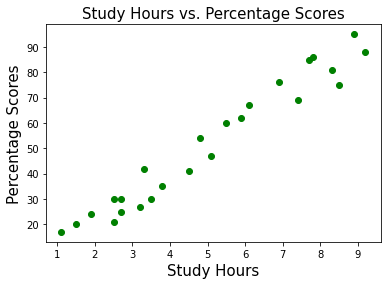

In [6]:
# Representing Scatter Plot
plt.xlabel('Study Hours', fontsize=15)
plt.ylabel('Percentage Scores', fontsize=15)
plt.title('Study Hours vs. Percentage Scores', fontsize=15)
plt.scatter(data.Hours, data.Scores, color='green', marker='o')
plt.show()

***The above Scatter Plot shows the positive linear relation between the number of hours studied and the percentage of scores gained.***

**Preparing the data to analyze**

In [7]:
# Divide data into labels(output) and attributes(input)
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [8]:
# To split the data into training and test sets, wse use Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Training the Algorithm**

In [9]:
# Following code is implemented so as to train the algorithm
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Tarining of Algorithm completed!")

Tarining of Algorithm completed!


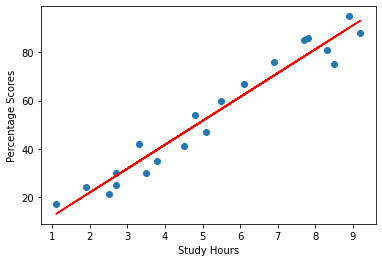

In [10]:
# Plotting the Regression line for training set
line = reg.coef_*X + reg.intercept_
plt.scatter(X_train, y_train)
plt.plot(X, line, color='red')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.show()

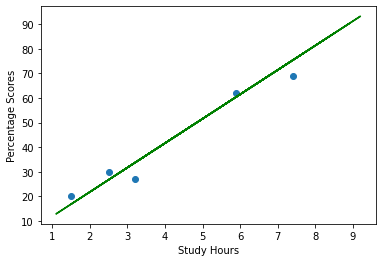

In [11]:
# Plotting the Regression line for test set
plt.scatter(X_test, y_test)
plt.plot(X, line, color='green')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.show()

**Making predictions**

In [12]:
# Testing data - In Hours
print(X_test)
# Predicting Scores
y_pred= reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual data vs. Predicted Data
compare_scores = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare_scores

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# Fit test
from sklearn import metrics
print("Accuracy of Actual and Predicted r-squared:-", metrics.r2_score(y_test, y_pred))

Accuracy of Actual and Predicted r-squared:- 0.9454906892105354


**Above 94% is the best model !**

**Evaluating the model**

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", MSE)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

Mean Squared Error :  21.598769307217456
Root Mean Squared Error :  4.647447612100373
Mean Absolute Error :  2.0454485813637513


**Small value of Mean Absolute Error states that the probability of wrong prediction is very low.**

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [16]:
hours = [9.25]
result = reg.predict([hours])
print("Predicted score for 9.25 hours a day : {}".format(result[0],2))

Predicted score for 9.25 hours a day : 93.69173248737539


**Hence, using the Regression Model we've concluded that if a student studies for 9.25 hours a day, then he/she is likely to score 93.69 marks.**